# Introducción


# Librerías

In [254]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import power_transform

# Redes Neuronales
import tensorflow as tf
import tensorflow.keras as kr
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Varios
import multiprocessing
import random
from itertools import product
import scipy.stats as stats
from math import floor, log10

# Datos

El set de datos `SaratogaHouses` del paquete `mosaicData` de `R` contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:



| Variable         | Descripción                                       |
|------------------|--------------------------------------------------|
| `price`            | Precio de la vivienda.                           |
| `lotSize`          | Metros cuadrados de la vivienda.                 |
| `age`              | Antigüedad de la vivienda.                       |
| `landValue`        | Valor del terreno.                               |
| `livingArea`       | Metros cuadrados habitables.                     |
| `pctCollege`       | Porcentaje del vecindario con título universitario.|
| `bedrooms`         | Número de dormitorios.                           |
| `fireplaces`       | Número de chimeneas.                             |
| `bathrooms`        | Número de cuartos de baño (0.5 para cuartos sin ducha).|
| `rooms`            | Número de habitaciones.                          |
| `heating`          | Tipo de calefacción.                             |
| `fuel`             | Tipo de alimentación de la calefacción (gas, electricidad o diesel).|
| `sewer`            | Tipo de desagüe.                                 |
| `waterfront`       | Si la vivienda tiene vistas al lago.            |
| `newConstruction`  | Si la vivienda es de nueva construcción.        |
| `centralAir`       | Si la vivienda tiene aire acondicionado.        |




**El objetivo es obtener un modelo capaz de predecir el precio del alquiler.**

# Carga del Dataset

Creamos la conexion hacia el repositorio de GitHub donde se encuentra alojado el Dataset con el que trabajaremos el modelo.

In [255]:
url = "https://raw.githubusercontent.com/Jonmaldosan/statistical_learning/91eec1cddc7d7f6913afaf8222821b44b96afb0b/house_prices.csv"
dataset = pd.read_csv(url, sep=",")
dataset.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


# Analisis Exploratorio del dataset

Antes de entrenar el modelo predictivo, es importante realizar una exploración descriptiva de los datos que contiene el dataset con el que vamos a trabajar. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo.

Tipo de Columnas que contiene el dataset

In [256]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


Número de observaciones y Valores nulos

In [257]:
# Dimensiones del dataset
dataset.shape

(1728, 16)

In [258]:
# Busqueda de valores nulos
nulos = dataset.columns[dataset.isnull().any()]

if nulos.empty:
    print("No existen valores nulos en el dataset.")
else:
    print("Columnas con valores nulos:", nulos)

No existen valores nulos en el dataset.


#### Distribución de la variable respuesta (Precio de Alquiler)

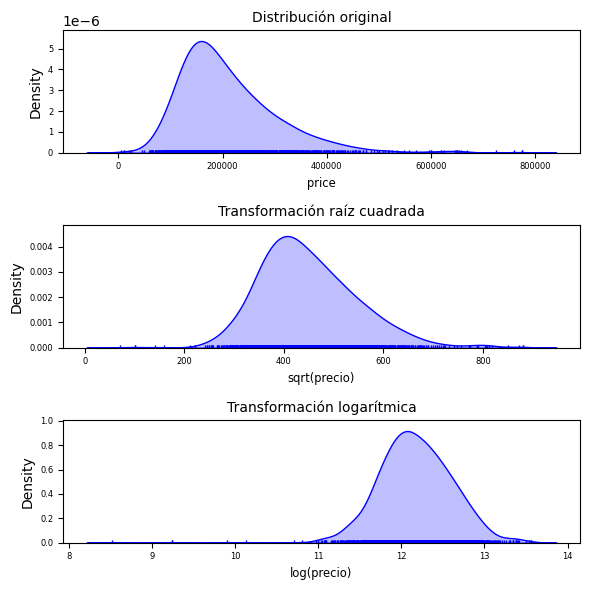

In [259]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    dataset.price,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    dataset.price,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('price', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(dataset.price),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(dataset.price),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(dataset.price),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(dataset.price),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

#### Distribucion de las variables numéricas

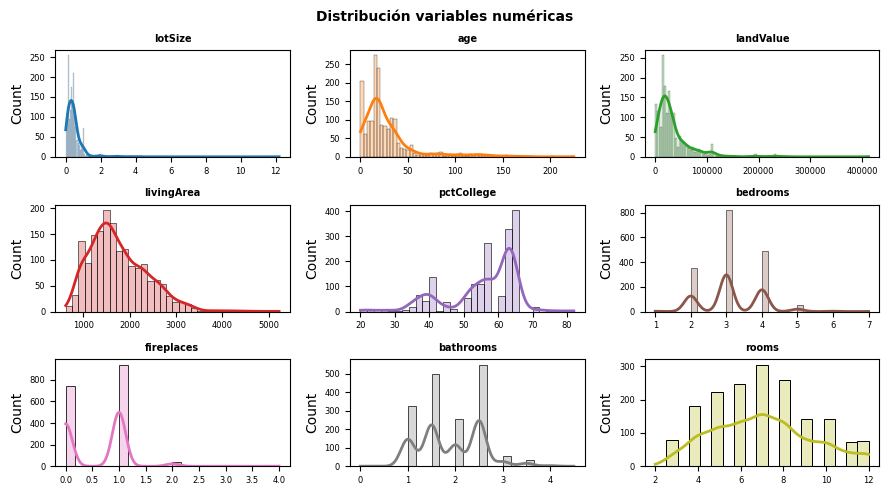

In [260]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = dataset,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable `fireplaces`, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [261]:
# Valores observados de fireplaces
dataset.fireplaces.value_counts().sort_index()

fireplaces
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [262]:
# Se convierte la variable fireplaces tipo string
dataset.fireplaces = dataset.fireplaces.astype("str")

In [263]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

dataset['fireplaces'] = (
    dataset['fireplaces']
    .map(dic_replace)
    .fillna(dataset['fireplaces'])
)

In [264]:
dataset.fireplaces.value_counts().sort_index()

fireplaces
0        740
1        942
2_mas     46
Name: count, dtype: int64

#### Análisis de Correlación Variables numéricas


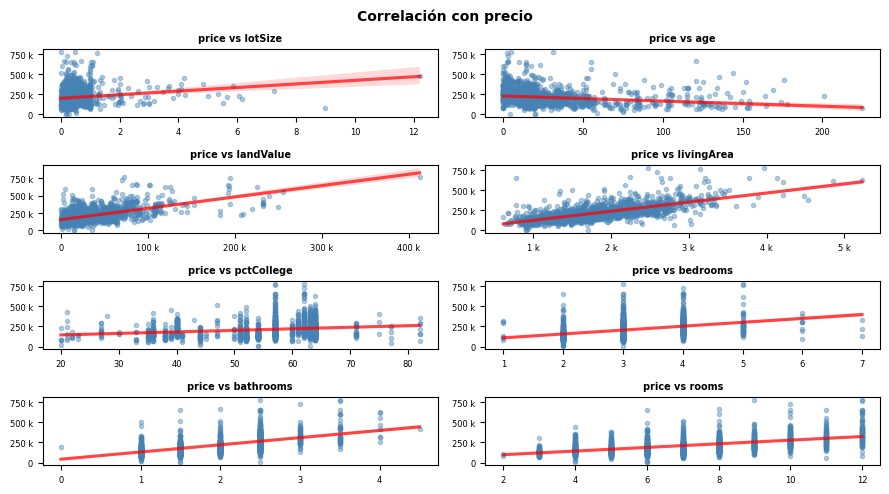

In [265]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('price')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = dataset[colum],
        y           = dataset['price'],
        color       = "steelblue",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"price vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

#### Análisis de Distribuación variables categóricas

In [266]:
# Variables cualitativas (tipo object)
dataset.select_dtypes(include=['object']).describe()

,fireplaces,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728,1728
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


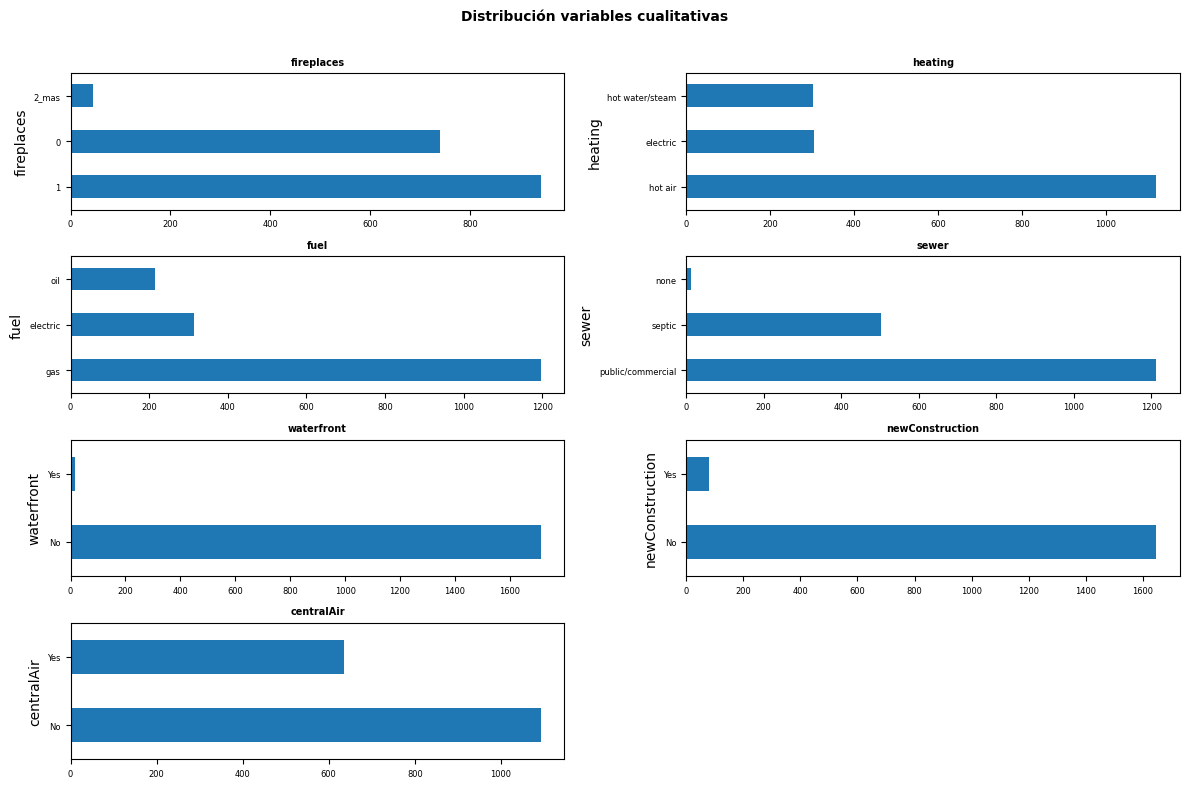

In [267]:
# Gráfico para cada variable cualitativa
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

# Tratamiento Outlieres

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWar

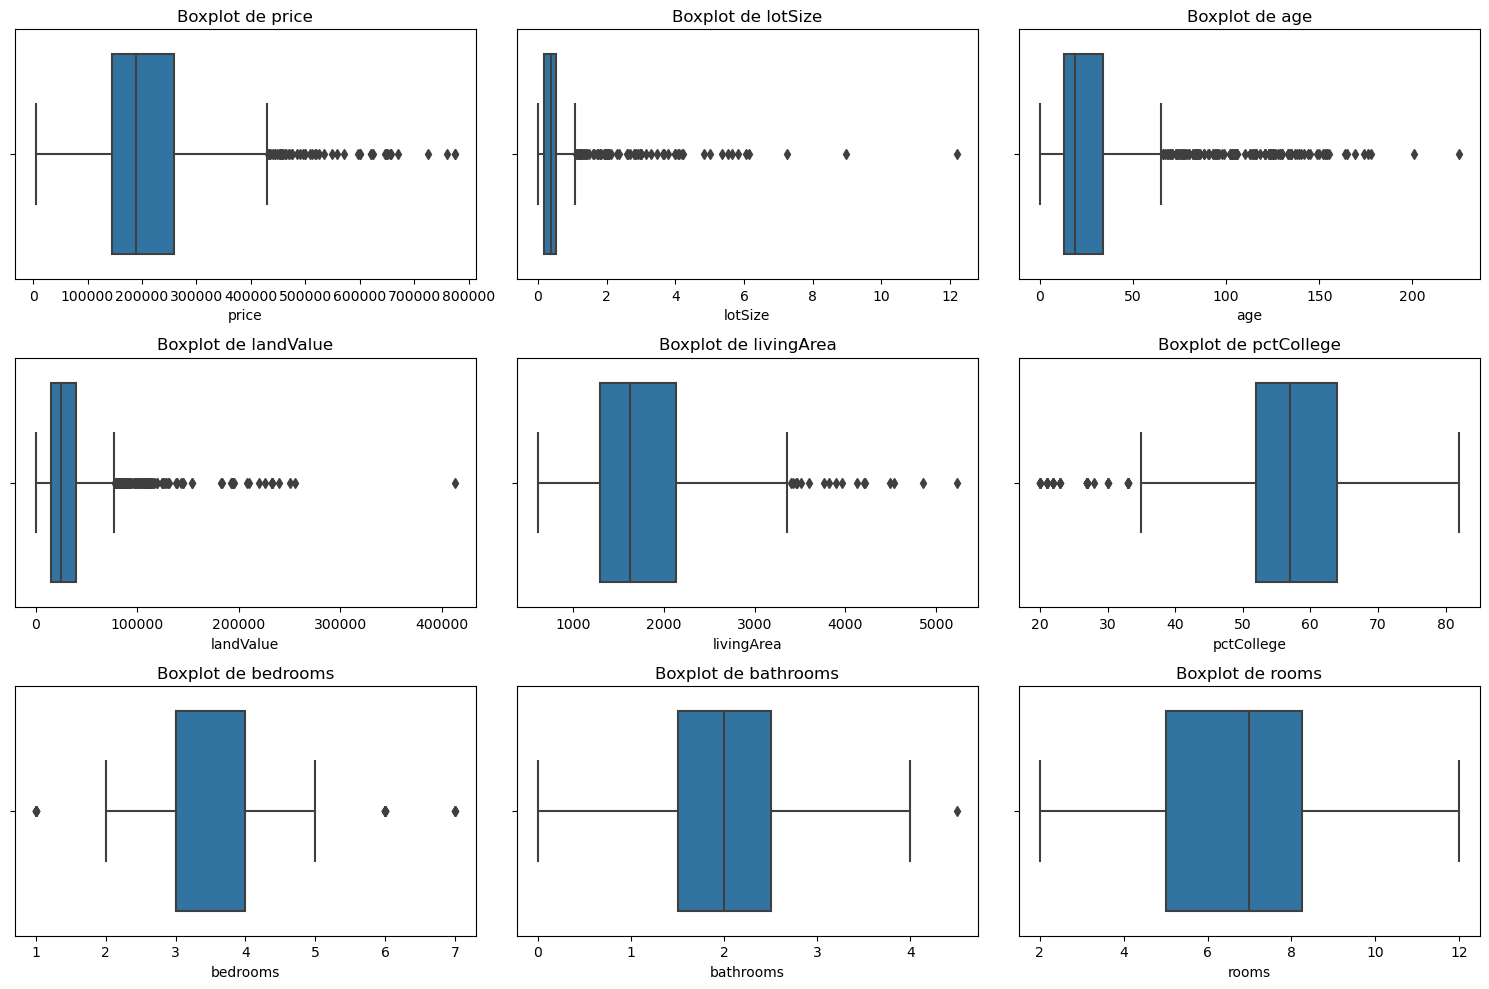

In [268]:
col_numeric = dataset.select_dtypes(include=['float64', 'int']).columns

# Crear subplots para los gráficos de boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=dataset[col], orient='vertical')
    plt.title(f'Boxplot de {col}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [269]:
columnas_numericas = dataset.select_dtypes(include=['number']).drop(columns=['price'])

In [270]:
columnas_numericas.describe()

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,1.900174,7.041667
std,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.658352,2.316453
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,2.500000,8.250000
max,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.500000,12.000000


#### Detección de Outliers con el método IQR

In [271]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna numérica
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)

# Calcular el rango intercuartil (IQR) para cada columna numérica
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar outliers en cada columna numérica
outliers = (columnas_numericas < limite_inferior) | (columnas_numericas > limite_superior)

# Mostrar los registros que contienen outliers en al menos una columna
registros_con_outliers = dataset[outliers.any(axis=1)]
registros_con_outliers

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No
7,170000,1.21,23,14600,1662,35,4,1,1.5,9,hot air,oil,septic,No,No,No
9,122900,1.94,4,21200,1416,44,3,0,1.5,6,hot air,gas,none,No,No,No
10,325000,2.29,123,12600,2894,51,7,0,1.0,12,hot air,oil,septic,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,382406,0.44,1,108900,2712,51,4,1,2.5,11,hot air,gas,public/commercial,No,Yes,Yes
1695,245000,0.36,106,35900,1836,51,4,1,1.5,8,hot air,gas,public/commercial,No,No,No
1705,221450,0.36,121,33000,2699,61,6,1,1.0,12,hot air,oil,septic,No,No,No
1715,70000,1.34,34,36700,1313,61,2,0,1.5,3,electric,electric,septic,No,No,No


#### Reemplazar valores Ouliers con el valor media de la columna

In [272]:
# Duplicar dataset
df_out = dataset

In [273]:
for columna in columnas_numericas:
    # Calcular el valor medio de la columna
    valor_medio = df_out[columna].mean()

    # Reemplazar los valores outliers en la columna por el valor medio
    df_out.loc[registros_con_outliers.index, columna] = valor_medio

#### Validación Outliers post tratamiento

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWar

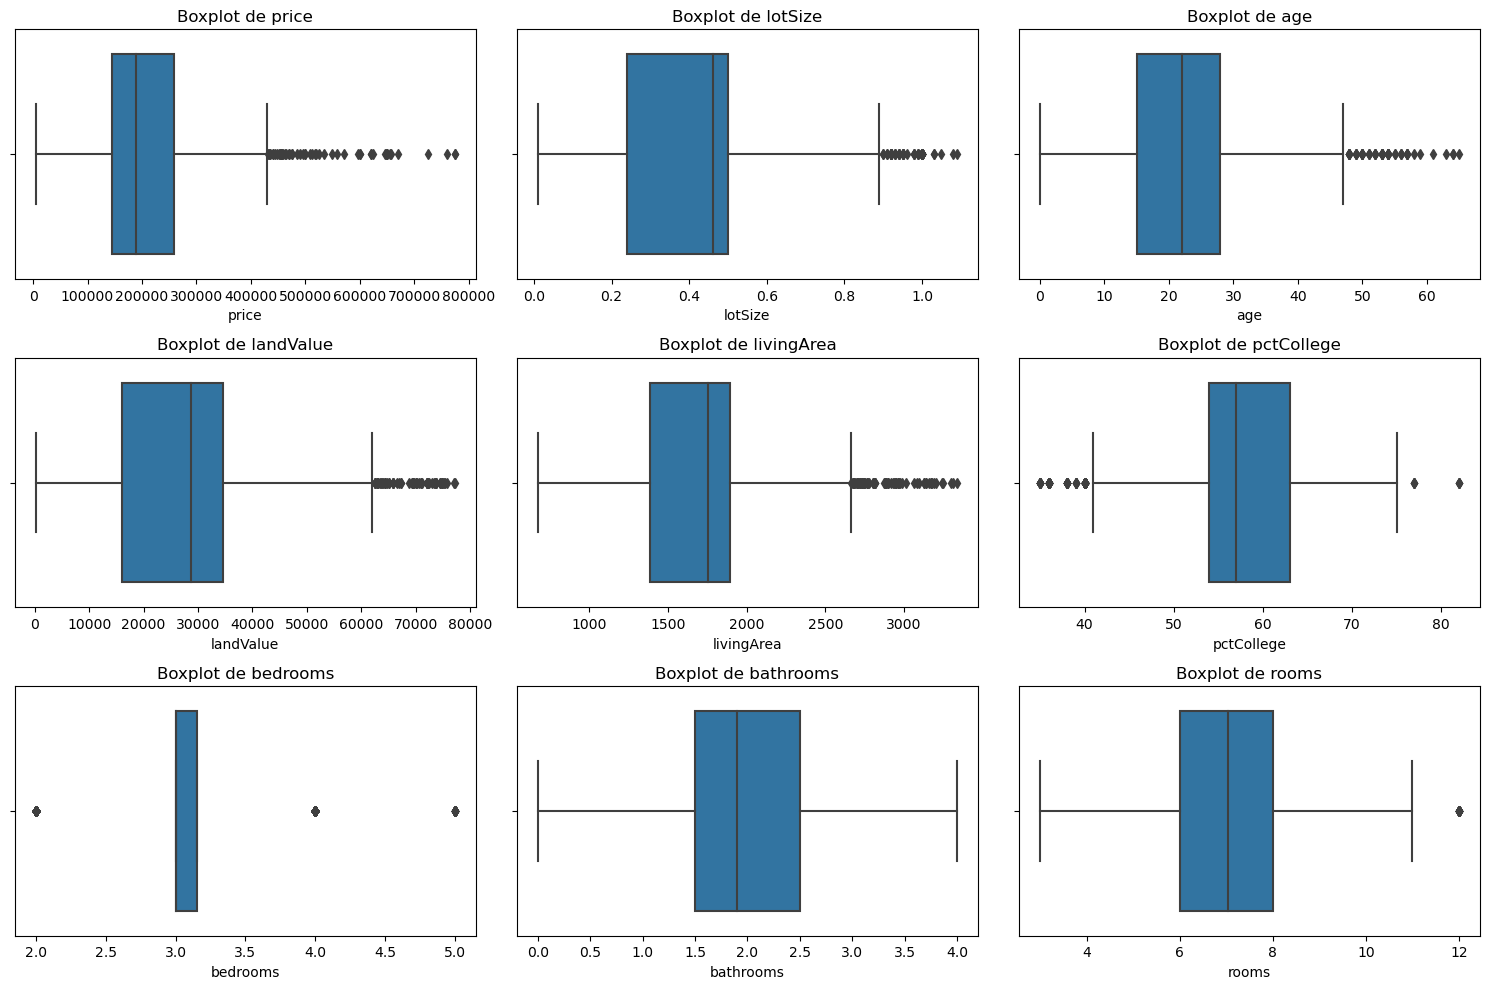

In [274]:
col_numeric = df_out.select_dtypes(include=['float64', 'int']).columns

# Crear subplots para los gráficos de boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_out[col], orient='vertical')
    plt.title(f'Boxplot de {col}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()


#### Eliminar registros Outliers

In [275]:
df_out = dataset.drop(registros_con_outliers.index)
df_out.shape

(1344, 16)

# Correlación de Variables

#### Matriz de Correlación

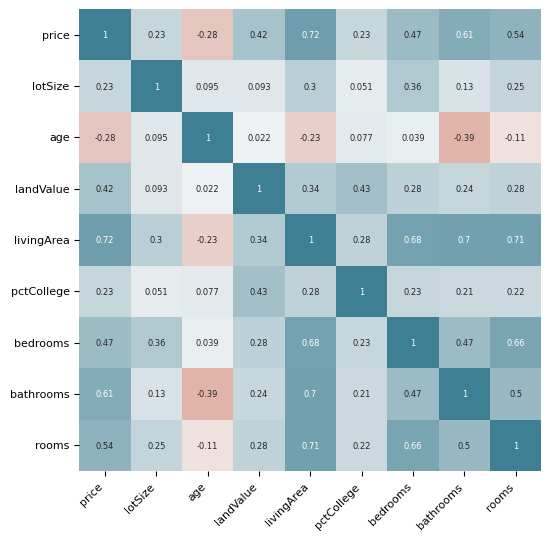

In [276]:
# Heatmap matriz de correlaciones

corr_matrix = df_out.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

#### Tabla de correlación

In [277]:
# Tabla de correlacion de Variables numéricas
correlation_with_price = corr_matrix['price']

correlation_with_price_df = pd.DataFrame(correlation_with_price)

# Ordena el DataFrame por el valor de correlación en orden descendente
correlation_with_price_df = correlation_with_price_df.sort_values(by='price', ascending=False)

print(correlation_with_price_df)

               price
price       1.000000
livingArea  0.724248
bathrooms   0.607490
rooms       0.540671
bedrooms    0.470563
landValue   0.415391
lotSize     0.232182
pctCollege  0.227776
age        -0.279597


# Procesamiento de datos e Ingeniería de características

#### Aplicar LabelEncoder a variables categóricas

#### LabelEncoding y Escalamiento

In [279]:
# Extraer la columna objetivo
y = df_out['price']

# Eliminar la columna objetivo del DataFrame original
df_out = df_out.drop('price', axis=1)

In [281]:
numeric_cols = df_out.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = df_out.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', RobustScaler(), numeric_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

In [282]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', RobustScaler(),
                                 ['lotSize', 'age', 'landValue', 'livingArea',
                                  'pctCollege', 'bedrooms', 'bathrooms',
                                  'rooms']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['fireplaces', 'heating', 'fuel', 'sewer',
                                  'waterfront', 'newConstruction',
                                  'centralAir'])])

In [283]:
# Ajusta y transforma los datos
data_prep = preprocessor.fit_transform(df_out)

# Obtiene los nombres de las columnas transformadas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
column_names = numeric_cols + list(encoded_cat)

# Crea un nuevo DataFrame con los datos transformados y los nombres de las columnas
df_out = pd.DataFrame(data_prep, columns=column_names)

In [316]:
df_out = df_out.reset_index(drop=True)
price = pd.DataFrame(y, columns=['price'])
price = price.reset_index(drop=True)

#### Transformacion Yeo Jhonson

In [314]:
# Aplicar la transformación Yeo-Johnson
data_bc = power_transform(X=df_out, method='yeo-johnson')

# Crear un nuevo DataFrame con las columnas transformadas
data_bc = pd.DataFrame(data_bc, columns=df_out.columns)

# Agregar la columna 'price' de nuevo al DataFrame transformado
data_final = pd.concat([data_bc, price], axis=1)

Distribucion post transformación

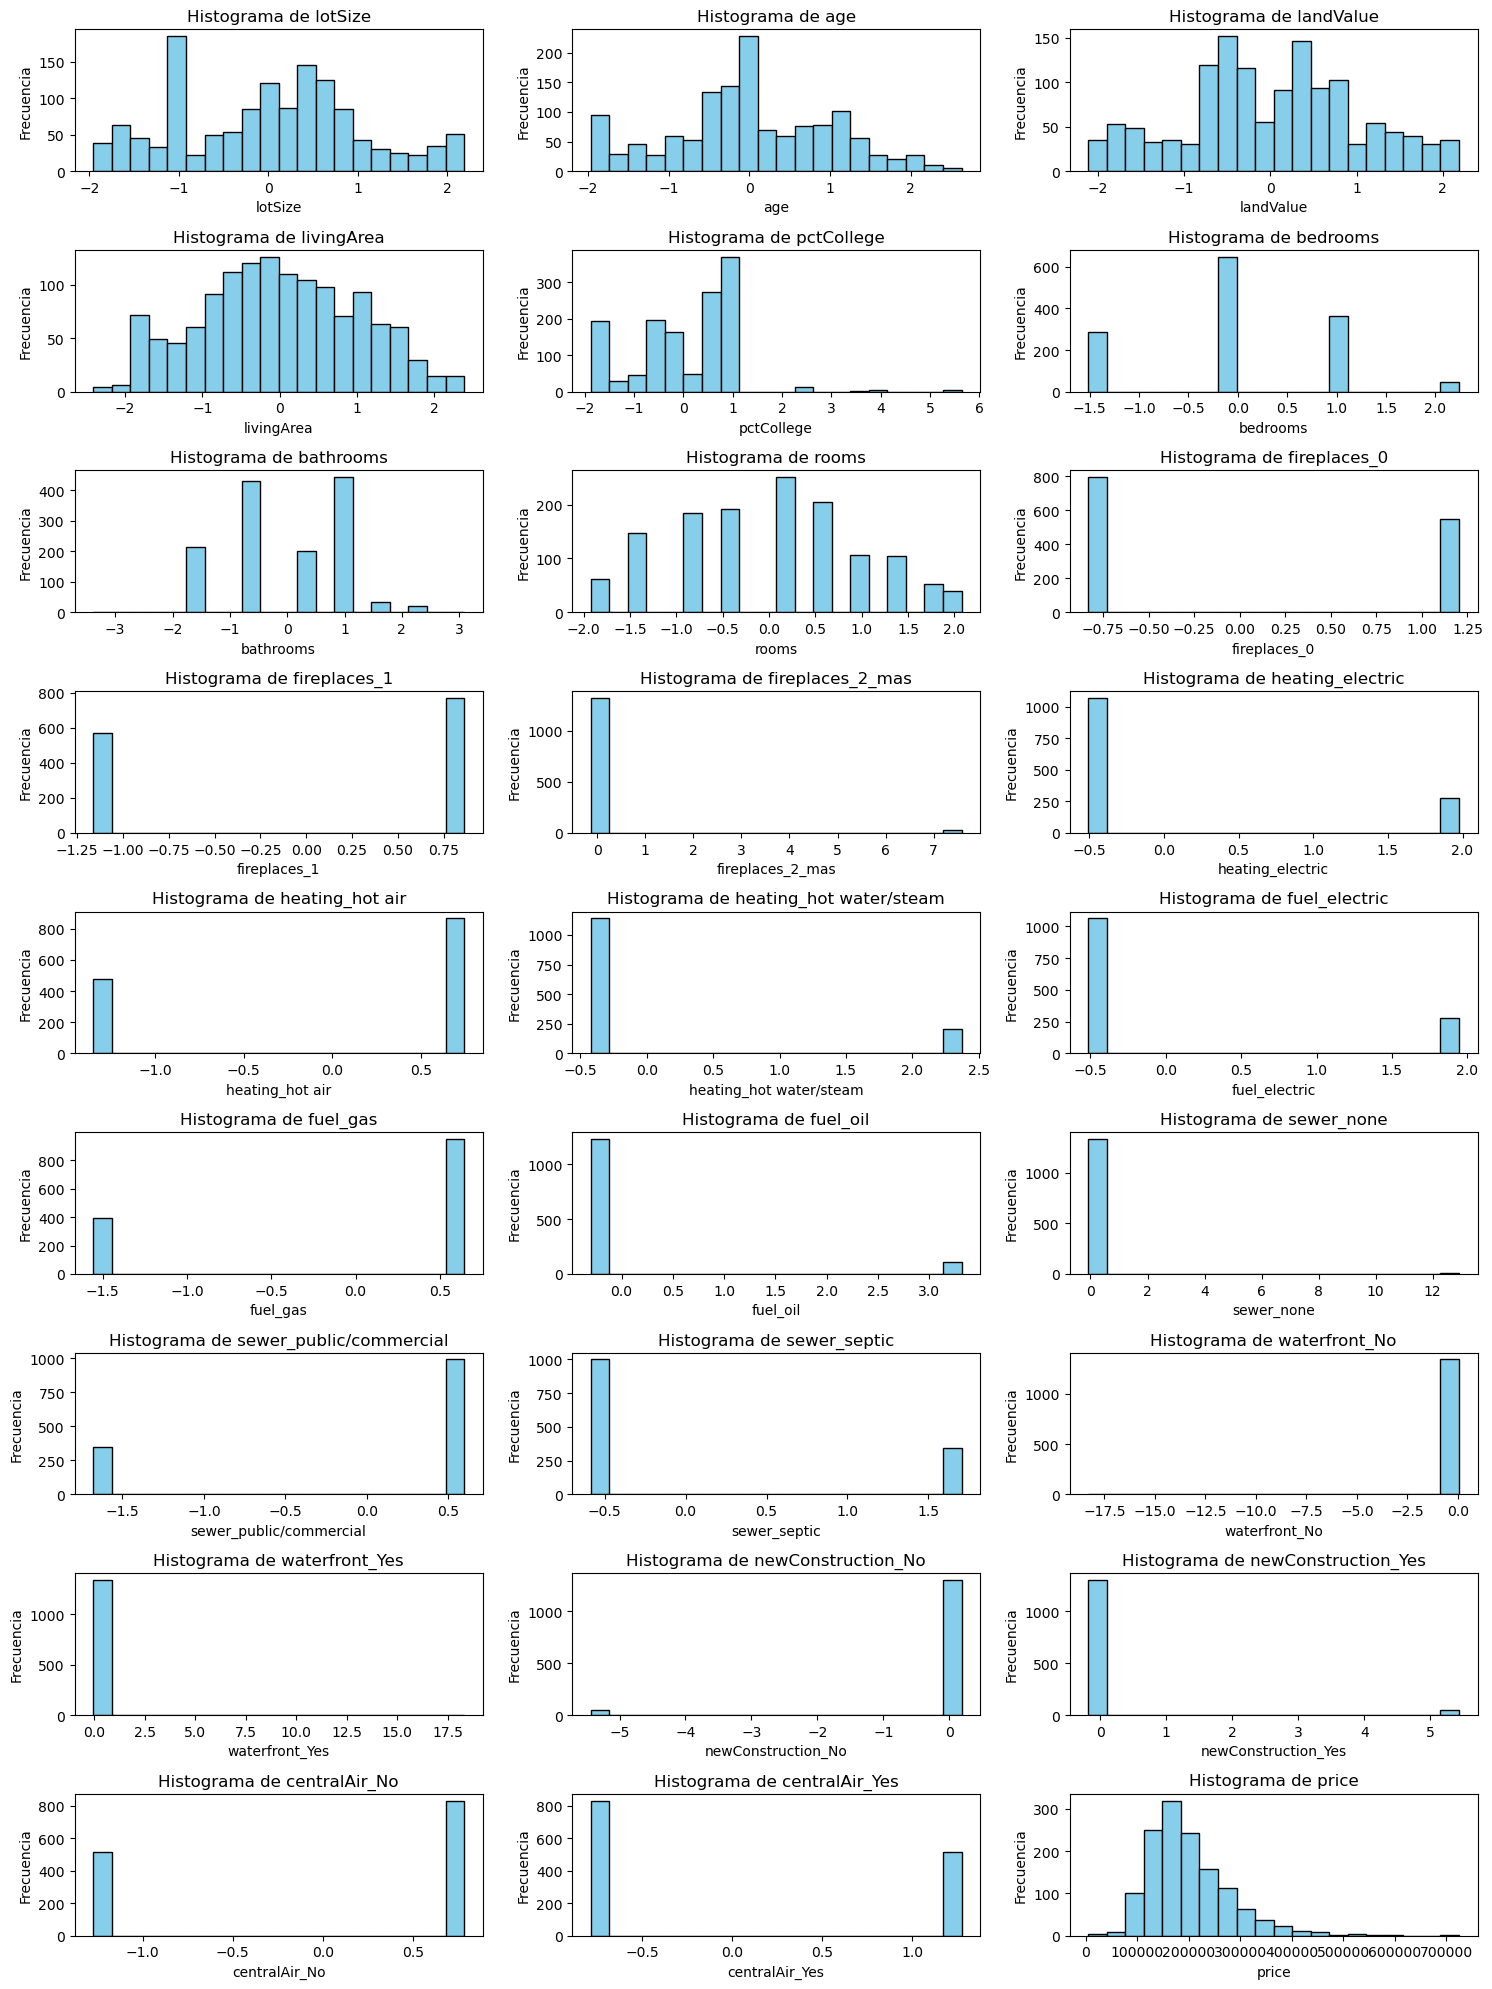

In [406]:
col_numerics = data_final.select_dtypes(include=['float64', 'int']).columns

# Crear subplots para los histogramas
plt.figure(figsize=(15, 20))
for i, col in enumerate(col_numerics, 1):
    plt.subplot(9, 3, i)
    plt.hist(data_final[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [395]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lotSize                  1344 non-null   float64
 1   age                      1344 non-null   float64
 2   landValue                1344 non-null   float64
 3   livingArea               1344 non-null   float64
 4   pctCollege               1344 non-null   float64
 5   bedrooms                 1344 non-null   float64
 6   bathrooms                1344 non-null   float64
 7   rooms                    1344 non-null   float64
 8   fireplaces_0             1344 non-null   float64
 9   fireplaces_1             1344 non-null   float64
 10  fireplaces_2_mas         1344 non-null   float64
 11  heating_electric         1344 non-null   float64
 12  heating_hot air          1344 non-null   float64
 13  heating_hot water/steam  1344 non-null   float64
 14  fuel_electric           

#### Correlacion post procesamiento de datos

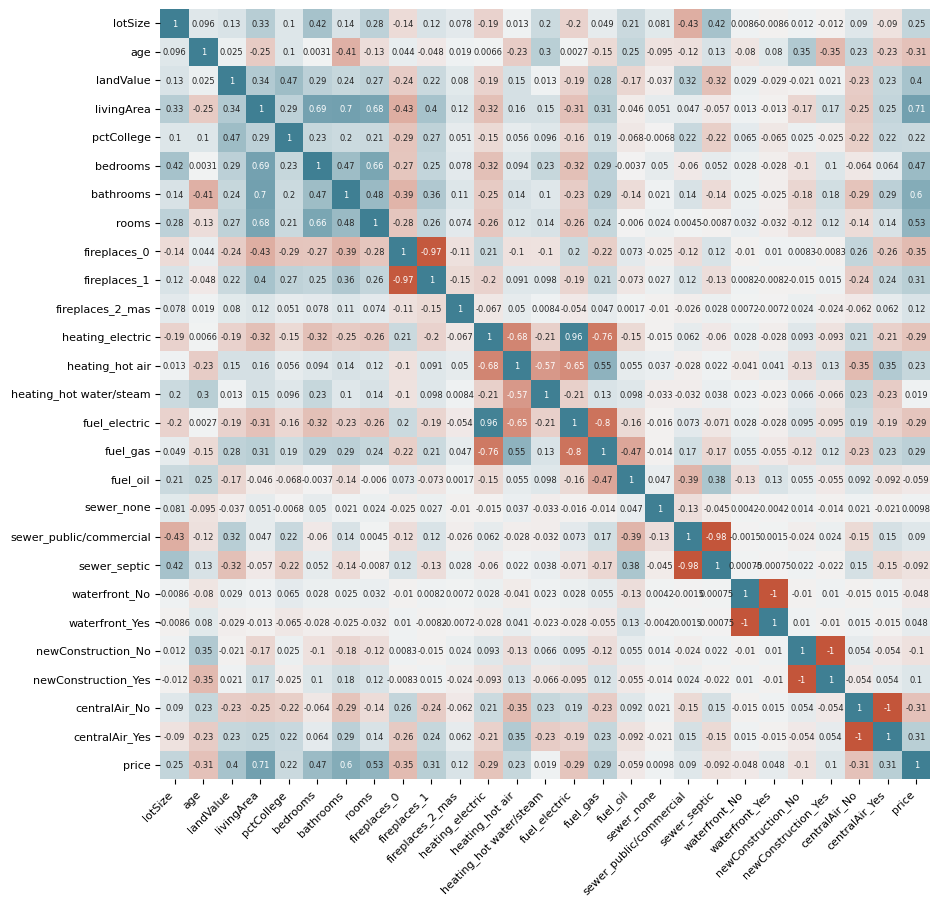

In [321]:
# Heatmap matriz de correlaciones
corr_matrix_2 = data_final.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

sns.heatmap(
    corr_matrix_2,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [323]:
# Tabla de correlacion de Variables numéricas
correlation_with_price_2 = corr_matrix_2['price']

correlation_with_price_df_2 = pd.DataFrame(correlation_with_price_2)

# Ordena el DataFrame por el valor de correlación en orden descendente
correlation_with_price_df_2 = correlation_with_price_df_2.sort_values(by='price', ascending=False)

print(correlation_with_price_df_2)

                            price
price                    1.000000
livingArea               0.706054
bathrooms                0.601516
rooms                    0.529168
bedrooms                 0.470795
landValue                0.399452
fireplaces_1             0.310836
centralAir_Yes           0.307656
fuel_gas                 0.291282
lotSize                  0.252060
heating_hot air          0.231246
pctCollege               0.218584
fireplaces_2_mas         0.124324
newConstruction_Yes      0.104151
sewer_public/commercial  0.089739
waterfront_Yes           0.048024
heating_hot water/steam  0.018942
sewer_none               0.009789
waterfront_No           -0.048024
fuel_oil                -0.059460
sewer_septic            -0.092139
newConstruction_No      -0.104151
fuel_electric           -0.285409
heating_electric        -0.291484
centralAir_No           -0.307656
age                     -0.309715
fireplaces_0            -0.345459


# División Train y Test

In [325]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data_final.drop('price', axis = 'columns'),
                                        data_final['price'],
                                        train_size   = 0.8,
                                        random_state = 10,
                                        shuffle      = True
                                    )

# Modelos de Machine Learning

#### Red Neuronal Feedforward

In [364]:
# Crear modelo de red neuronal
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Compilar el modelo
model_1.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
31/31 [==============================] - 1s 6ms/step - loss: 46409347072.0000 - val_loss: 42365431808.0000
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 46407589888.0000 - val_loss: 42363142144.0000
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 46403747840.0000 - val_loss: 42357903360.0000
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 46395453440.0000 - val_loss: 42347499520.0000
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 46379515904.0000 - val_loss: 42328625152.0000
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 46351982592.0000 - val_loss: 42297622528.0000
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 46309134336.0000 - val_loss: 42251264000.0000
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 46246739968.0000 - val_loss: 42187165696.0000
Epoch 9/50
31/31 [==============================] - 0s 2

In [365]:
# Evaluar el modelo
loss = model_1.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

9/9 [==============================] - 0s 1ms/step - loss: 15687700480.0000
Pérdida en el conjunto de prueba: 15687700480.0


In [366]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_1.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

9/9 [==============================] - 0s 1ms/step
Error Cuadrático Medio (MSE): 15687701048.909056


#### Red Neuronal Feedforward + Cross Validation

In [329]:
X = pd.concat([X_train, X_test], axis=0, ignore_index=True)

In [330]:
y = pd.concat([y_train, y_test], axis=0, ignore_index=True)

In [367]:
# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar la validación cruzada (K-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados de validación cruzada
mse_scores = []

# Iterar a través de las divisiones de validación cruzada
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear el modelo de red neuronal con regularización L2
    model_2 = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dense(1)  # Capa de salida para regresión
    ])

    # Compilar el modelo
    model_2.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 45638516736.0000 - val_loss: 45278388224.0000
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 45623226368.0000 - val_loss: 45240627200.0000
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 45526634496.0000 - val_loss: 45047894016.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 45151772672.0000 - val_loss: 44407873536.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 44146470912.0000 - val_loss: 42847068160.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 41886285824.0000 - val_loss: 39742337024.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 37875056640.0000 - val_loss: 34589720576.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 31765864448.0000 - val_loss: 27407501312.0000
Epoch 9/100
34/34 [=============================

In [368]:
# Evaluar el modelo en el conjunto de validación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)

# Calcular el promedio de los errores cuadrados medios (MSE) de todas las divisiones
average_mse = np.mean(mse_scores)
print(f"Error cuadrado medio promedio en validación cruzada: {average_mse}")

9/9 [==============================] - 0s 1ms/step
Error cuadrado medio promedio en validación cruzada: 1983945355.368465


In [369]:
# Crear un DataFrame para comparar los valores reales y las predicciones
y_test = y_test.values.reshape(-1)
y_pred = y_pred.reshape(-1)
comparison_df_1 = pd.DataFrame({'Valor Real (y_test)': y_test, 'Predicción del Modelo (y_pred)': y_pred})
comparison_df_1

,Valor Real (y_test),Predicción del Modelo (y_pred)
0,270000,268921.812500
1,169900,253780.203125
2,89900,121354.281250
3,210000,240532.609375
4,155000,138909.890625
...,...,...
263,230000,206040.468750
264,139900,170758.546875
265,153000,195666.625000
266,195000,198805.000000


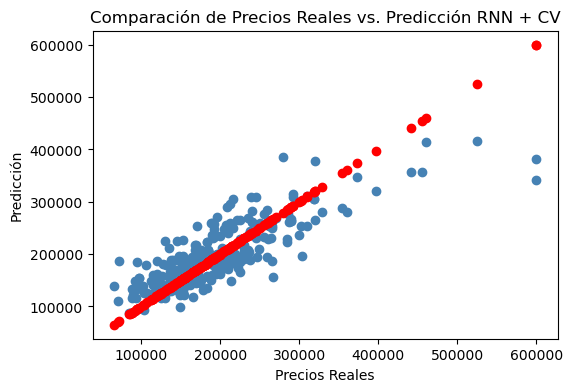

In [371]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.scatter(y_test, y_pred, c='steelblue', label='Precios Reales')
plt.scatter(y_test, y_test, c='r', label='Predicción')
plt.xlabel("Precios Reales")
plt.ylabel("Predicción")
plt.title("Comparación de Precios Reales vs. Predicción RNN + CV")
plt.grid(False)

# Mostrar el gráfico
plt.show()

In [373]:
# Evaluar el rendimiento del modelo (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 32903.28675956157
MSE: 1983945355.368465
RMSE: 44541.501494319484
VarScore: 0.6716284464522253


#### Arquitectura LSTM + Cross Validation

In [374]:
# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar la validación cruzada (K-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados de validación cruzada
mse_scores = []

# Iterar a través de las divisiones de validación cruzada
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear el modelo de red neuronal LSTM
    model_3 = keras.Sequential([
        LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(32, activation='relu', return_sequences=True),
        Flatten(),
        layers.Dense(1, activation='linear')  # Capa de salida para regresión
    ])

    # Implementar EarlyStopping para detener el entrenamiento si no mejora
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Compilar el modelo
    model_3.compile(optimizer='adam', loss='mean_squared_error')

    # Añadir una dimensión adicional a los datos de entrada para que sean compatibles con LSTM
    X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Entrenar el modelo
    history = model_3.fit(X_train_lstm, y_train, epochs=200, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/200
34/34 [==============================] - 6s 60ms/step - loss: 41723523072.0000 - val_loss: 28937988096.0000
Epoch 2/200
34/34 [==============================] - 1s 39ms/step - loss: 40836505600.0000 - val_loss: 25219952640.0000
Epoch 3/200
34/34 [==============================] - 2s 45ms/step - loss: 11978482688.0000 - val_loss: 9989230592.0000
Epoch 4/200
34/34 [==============================] - 2s 45ms/step - loss: 7692610048.0000 - val_loss: 6592858112.0000
Epoch 5/200
34/34 [==============================] - 2s 45ms/step - loss: 5835634176.0000 - val_loss: 5512464384.0000
Epoch 6/200
34/34 [==============================] - 2s 56ms/step - loss: 4998114304.0000 - val_loss: 5196084736.0000
Epoch 7/200
34/34 [==============================] - 2s 55ms/step - loss: 4789294592.0000 - val_loss: 4302906368.0000
Epoch 8/200
34/34 [==============================] - 2s 45ms/step - loss: 4153897216.0000 - val_loss: 5412724736.0000
Epoch 9/200
34/34 [==============================] 

In [380]:
# Evaluar el modelo en el conjunto de validación
y_pred = model_3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)

# Calcular el promedio de los errores cuadrados medios (MSE) de todas las divisiones
average_mse = np.mean(mse_scores)
print(f"Error cuadrado medio promedio en validación cruzada: {average_mse}")

9/9 [==============================] - 1s 13ms/step
Error cuadrado medio promedio en validación cruzada: 2405421365.359618


In [376]:
# Crear un DataFrame para comparar los valores reales y las predicciones
y_test = y_test.values.reshape(-1)
y_pred = y_pred.reshape(-1)
comparison_df_2 = pd.DataFrame({'Valor Real (y_test)': y_test, 'Predicción del Modelo (y_pred)': y_pred})
comparison_df_2

,Valor Real (y_test),Predicción del Modelo (y_pred)
0,270000,241731.765625
1,169900,217057.468750
2,89900,182177.937500
3,210000,232856.578125
4,155000,122934.007812
...,...,...
263,230000,220029.515625
264,139900,191593.703125
265,153000,188031.609375
266,195000,218309.343750


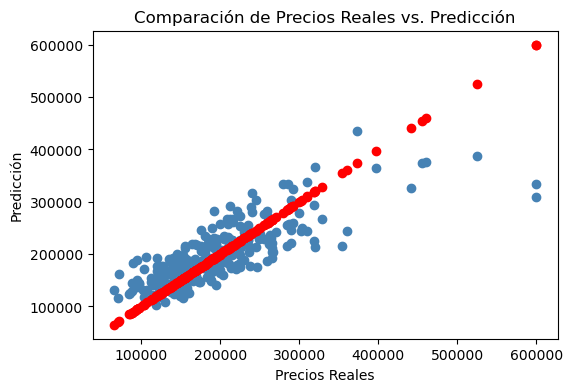

In [377]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.scatter(y_test, y_pred, c='steelblue', label='Precios Reales')
plt.scatter(y_test, y_test, c='r', label='Predicción')
plt.xlabel("Precios Reales")
plt.ylabel("Predicción")
plt.title("Comparación de Precios Reales vs. Predicción")
plt.grid(False)

# Mostrar el gráfico
plt.show()

In [378]:
# Evaluar el rendimiento del modelo (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 35114.02635261194
MSE: 2276508009.455884
RMSE: 47712.765686510815
VarScore: 0.6243373862526327


#### ANN + Cross Validation + EarlyStopping

In [379]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar la validación cruzada (K-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados de validación cruzada
mse_scores = []

# Iterar a través de las divisiones de validación cruzada
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Construir un modelo de Red Neuronal Artificial (ANN)
    model_4 = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),  # Agregar regularización Dropout
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para la regresión
    ])

    # Implementar EarlyStopping para detener el entrenamiento si no mejora
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Guardar el mejor modelo durante el entrenamiento
    checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

    # Compilar el modelo
    model_4.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model_4.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint],
    verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 45638172672.0000 - val_loss: 45277528064.0000
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 45621182464.0000 - val_loss: 45237698560.0000
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 45521739776.0000 - val_loss: 45039161344.0000
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 45142982656.0000 - val_loss: 44394520576.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 44098793472.0000 - val_loss: 42812170240.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 41821777920.0000 - val_loss: 39600418816.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 37521592320.0000 - val_loss: 34183374848.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 31101968384.0000 - val_loss: 26701037568.0000
Epoch 9/200
34/34 [=============================

In [381]:
# Evaluar el modelo en el conjunto de validación
y_pred = model_4.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)

# Calcular el promedio de los errores cuadrados medios (MSE) de todas las divisiones
average_mse = np.mean(mse_scores)
print(f"Error cuadrado medio promedio en validación cruzada: {average_mse}")

9/9 [==============================] - 0s 980us/step
Error cuadrado medio promedio en validación cruzada: 2209793949.6060343


In [382]:
# Crear un DataFrame para comparar los valores reales y las predicciones
y_test = y_test.values.reshape(-1)
y_pred = y_pred.reshape(-1)
comparison_df_3 = pd.DataFrame({'Valor Real (y_test)': y_test, 'Predicción del Modelo (y_pred)': y_pred})
comparison_df_3

,Valor Real (y_test),Predicción del Modelo (y_pred)
0,270000,269455.968750
1,169900,252922.359375
2,89900,120372.460938
3,210000,240301.312500
4,155000,135552.796875
...,...,...
263,230000,205608.093750
264,139900,173161.875000
265,153000,197908.718750
266,195000,197436.875000


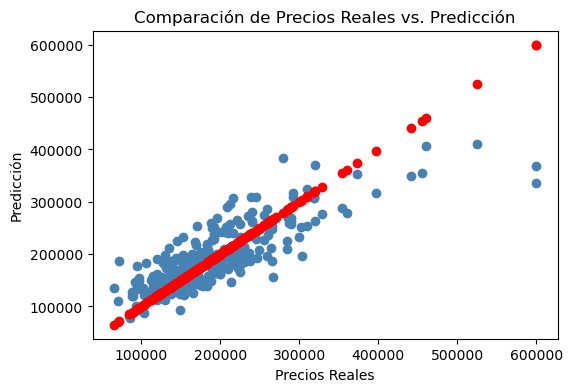

In [383]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.scatter(y_test, y_pred, c='steelblue', label='Precios Reales')
plt.scatter(y_test, y_test, c='r', label='Predicción')
plt.xlabel("Precios Reales")
plt.ylabel("Predicción")
plt.title("Comparación de Precios Reales vs. Predicción")
plt.grid(False)

# Mostrar el gráfico
plt.show()

In [384]:
# Evaluar el rendimiento del modelo (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 32823.42828824627
MSE: 2014166533.85245
RMSE: 44879.466728699554
VarScore: 0.665389795532418


#### ANN + Busqueda de Hiperparámetros

In [426]:
# Definir rangos de capas ocultas, épocas y tamaños de lote (batch size)
num_capas_ocultas = range(1, 10)
epocas_rango = range(10, 101, 20)  # De 10 a 100 épocas con incrementos de 10
tamanos_lote = range(10, 101, 20)  # De 10 a 100 tamaños de lote con incrementos de 10

mejor_num_capas = None
mejor_num_epocas = None
mejor_tamano_lote = None
mejor_mse = float('inf')

for num_capas in num_capas_ocultas:
    for num_epocas in epocas_rango:
        for tamano_lote in tamanos_lote:
            model_5 = keras.Sequential()
            model_5.add(keras.layers.Input(shape=(X_train.shape[1],)))
            
            for _ in range(num_capas):
                model_5.add(keras.layers.Dense(13, activation='relu'))
            model_5.add(keras.layers.Dense(1)) 
            model_5.compile(optimizer='adam', loss='mean_squared_error') 
            
            model_5.fit(X_train, y_train, epochs=num_epocas, batch_size=tamano_lote, verbose=0)   # Entrena el modelo
            y_pred = model_5.predict(X_test) # Realiza predicciones 
            
            mse = mean_squared_error(y_test, y_pred) 
            
            if mse < mejor_mse:
                mejor_num_capas = num_capas
                mejor_num_epocas = num_epocas
                mejor_tamano_lote = tamano_lote
                mejor_mse = mse

print(f"La mejor configuración tiene {mejor_num_capas} capas ocultas, {mejor_num_epocas} épocas y un tamaño de lote de {mejor_tamano_lote} con un MSE mínimo de {mejor_mse}")

9/9 [==============================] - 0s 971us/step
La mejor configuración tiene 8 capas ocultas, 70 épocas y un tamaño de lote de 10 con un MSE mínimo de 1928366131.1859012


In [437]:
# Evaluar el modelo en el conjunto de validación
y_pred = model_5.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)

# Calcular el promedio de los errores cuadrados medios (MSE) de todas las divisiones
average_mse = np.mean(mse_scores)
print(f"Error cuadrado medio promedio en validación cruzada: {average_mse}")

9/9 [==============================] - 0s 1ms/step
Error cuadrado medio promedio en validación cruzada: 2120223699.8011189


In [438]:
# Crear un DataFrame para comparar los valores reales y las predicciones
y_pred = y_pred.reshape(-1)
comparison_df_4 = pd.DataFrame({'Valor Real (y_test)': y_test, 'Predicción del Modelo (y_pred)': y_pred})
comparison_df_4

,Valor Real (y_test),Predicción del Modelo (y_pred)
0,270000,269134.656250
1,169900,243782.125000
2,89900,130431.187500
3,210000,240728.109375
4,155000,126214.242188
...,...,...
263,230000,231045.468750
264,139900,170206.000000
265,153000,197041.828125
266,195000,188880.343750


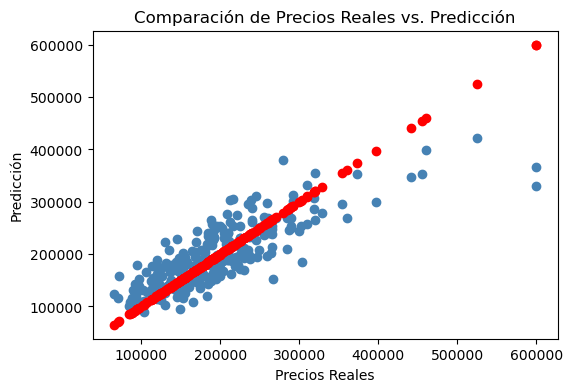

In [435]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.scatter(y_test, y_pred, c='steelblue', label='Precios Reales')
plt.scatter(y_test, y_test, c='r', label='Predicción')
plt.xlabel("Precios Reales")
plt.ylabel("Predicción")
plt.title("Comparación de Precios Reales vs. Predicción")
plt.grid(False)

# Mostrar el gráfico
plt.show()

In [442]:
# Evaluar el rendimiento del modelo (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 33940.625116604475
MSE: 2060510199.9311752
RMSE: 45392.84304745821
VarScore: 0.6579038980888181


# Comparación de Resultados

In [427]:
data_mse = {
    'Modelo': ['ANN + Cross Validation + EarlyStopping', 'LSTM + Cross Validation + EarlyStopping', 'ANN Feedforward + Cross Validation', 'ANN Feedforward', 'Búsqueda de Hiperparámetros'],
    'MSE': [2014166533.85245, 2276508009.455884, 1983945355.368465, 15687701048.909056, 1928366131.1859012]
}

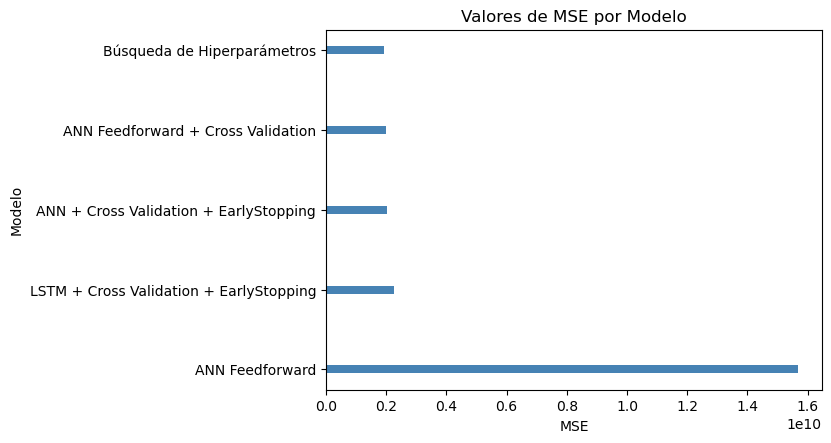

In [428]:
# Ordenar los datos por valor de MSE en orden descendente
data_mse['Modelo'], data_mse['MSE'] = zip(*sorted(zip(data_mse['Modelo'], data_mse['MSE']), key=lambda x: x[1], reverse=True))

# Extraer los nombres de los modelos y los valores de MSE
modelos = data_mse['Modelo']
mse_values = data_mse['MSE']

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras horizontales con grosor mínimo
ax.barh(modelos, mse_values, color='Steelblue', height=0.1)

# Ajustar el espaciado entre las barras en el eje Y (yticks)
y_positions = range(len(modelos))
ax.set_yticks(y_positions)
ax.set_yticklabels(modelos)

# Reducir el espacio entre las categorías en el eje Y
plt.subplots_adjust(top=0.90, bottom=0.15)

# Configurar etiquetas y título
ax.set_xlabel('MSE')
ax.set_ylabel('Modelo')
ax.set_title('Valores de MSE por Modelo')

# Mostrar el gráfico
plt.show()